## Analyzing Tabular Omics Data using Pandas DataFrames



## Analyzing A Feature Table of Microbial Counts


In this jupyter notebook we will do some basic graphing of a feature table of microbes by samples. We'll work with tabular data representing one of the microbiome change scenarios from the previous section. 

Here is the scenario in cartoon form:
<img src="./resources/Scenario_1_specific_pathogen_w_table-01.png" width="400"  description="A cartoon of multicolored microbes in 6 healthy people or 6 people with a disease. The picture shows 12 boxes (one per person). In each box there are multiple microbes of different types. A table below will list the counts of microbes in each sample if you cannot view them here."> 



#### Checking that the raw data is present

As a first step let's check that we have 'scenario1_otus.txt' in our current working directory. The listdir function in the builtin os module returns a list of all contents of a specified directory on your computer.

It can be useful to run it prior to trying to open files if you need to remember filenames. In this case, the raw data we want to open is stored in the resources folder within the folder for this chapter. Let's import the listdir function and quickly check that our data is there...

In [17]:
from os import listdir
print("Directory contents:",listdir("./resources/"))

Directory contents: ['.DS_Store', 'evenness.png', 'richness.png', 'richness_vs_eveness.png', 'scenario1_otus_pandas.txt', 'Scenario_1_specific_pathogen_no_table-01.png', 'Scenario_1_specific_pathogen_table_only.png', 'Scenario_1_specific_pathogen_w_table-01.png', 'Scenario_2_community_shift.ai', 'Scenario_2_community_shift_no_table-01.png', 'Scenario_3_microbial_overgrowth_no_table-01.png', 'Scenario_4_alpha_diversity_with_table_r2-01.png', 'Scenario_5_beta_diversity_no_table-01.png']


Great. Now that we've seen that the data is available, let's load it into python using [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)!

In [18]:
from pandas import read_csv

#Load the text version of the table (a csv file) into python using pandas
feature_table = read_csv("./resources/scenario1_otus_pandas.txt",sep="\t")

Once we've seen that the table loaded, let's work on figuring out how pandas is representing it inside python. We'll use the type() function to work out what type of object our feature table is:

In [19]:
type(feature_table)

pandas.core.frame.DataFrame

It looks like our table of data has been loaded as a pandas DataFrame. DataFrame objects serve as a convenient and very powerful way to represent tabular data. They represent those data as a table with row and column labels. Subsets of the data along a row or column can be pulled out as pandas Series objects.

To examine the feature table in a Jupyter notebook, we can simply type the name of the variable that holds it on it's own line:


In [20]:
feature_table

,OTU_ID,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
0,OTU1,3,4,2,2,0,4,4,4,0,3,2,2
1,OTU2,4,1,3,4,1,3,3,3,4,1,1,4
2,OTU3,1,4,2,1,4,2,2,2,1,4,4,1
3,OTU4,2,3,0,1,2,0,1,2,3,0,2,1
4,OTU5,0,0,0,0,0,0,1,4,2,2,3,4


#### Setting the row labels

An important feature of pandas DataFrames is their index column. This serves as a set of unique row labels for each row in your data. Because we didn't specify an index column when we loaded our data we have to set it manually. We can do so with the dataframe's set_index method.

In [21]:
#Use OTU ID column to label each row
feature_table = feature_table.set_index('OTU_ID')

If we view the dataframe again, we should notice that the left hand column of numbers has dissapeared, and our rows are now correctly labelled by microbe

### Graphing the data

One of the advantages of pandas DataFrames is that they integrate well with many other commonly used visualization and statistics packages in python. One package that is commonly used to graph data held in pandas dataframes is the seaborn visualization package.

The clustermap function in seaborn is a convenient way to make a heatmap of our data, clustered according to the similarity of rows and columns. In this chart the rows will be the different microbes, the columns will be the patients, and the color of each cell will represent the count of microbes in each patient. The order of the  rows and columns will reflect the similarity of their counts.

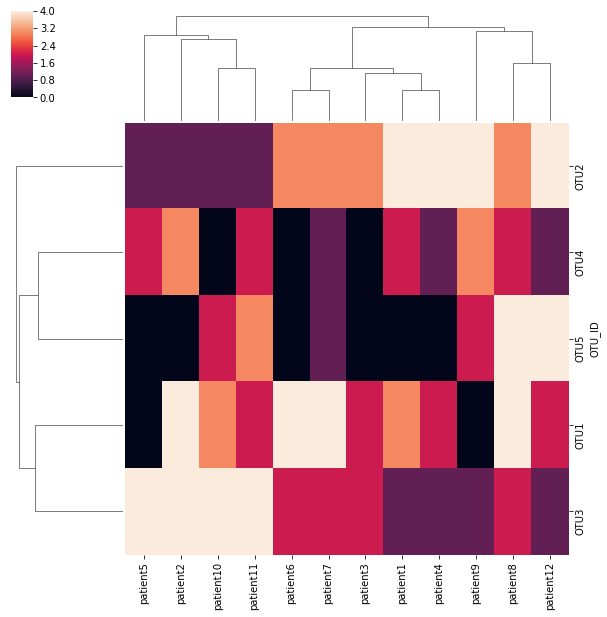

In [22]:
%matplotlib inline
from seaborn import clustermap
clustermap(feature_table)

If we don't want to cluster the data, and just want a basic heatmap, we can set the row_cluster and col_cluster parameters to False.

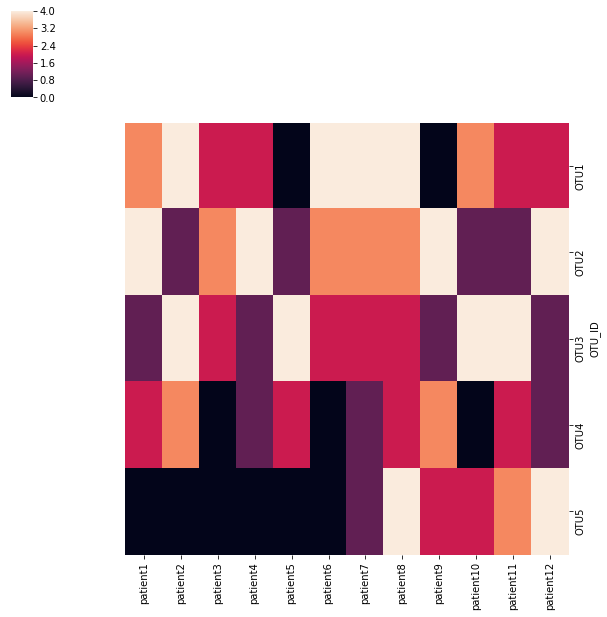

In [23]:
clustermap(feature_table,row_cluster=False,col_cluster=False)

If we wanted to swap the rows and columns, we could use the pandas DataFrame method .transpose() to swap the rows and columns of the DataFrame, and then rerun the clustermap on the transposed data. We can also separately control clustering of rows and columns with the row_cluster and col_cluster parameters. Finally, we can change the color mapping or 'cmap' using the cmap paramter. 

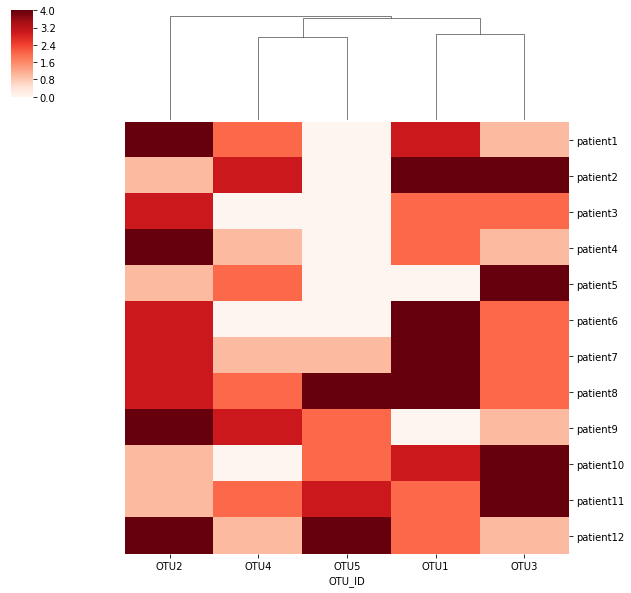

In [24]:
feature_table_transposed = feature_table.transpose()
clustermap(feature_table_transposed, row_cluster=False,col_cluster=True,cmap='Reds')

#### Accessing column data

We might want to access the rows or columns of our pandas data directly so that we can do calculations. A nice tutorial on this can be found here: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/.

In brief, we can select a column by indexing into the pandas DataFrame object using a column name. I currently have the OTUs as columns, so we could access them with feature_table["OTU1"]

In [25]:
#Access a column 
print(feature_table["patient1"])

OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


However, this way of selecting columns in pandas is a bit special-purpose - it doesn't always extend in the simplest way to rows for example.

#### A consistent way to access row or column data in pandas

An alternative way to index into a pandas DataFrame is by using the .loc indexer (accessed by the name of your dataframe and then .loc)

Note that this is not called like a function (so not 'df.loc('whatever')'), but more a way of indexing (closer to how you would call it if loc were a dict that was a property of the dataframe).

When using .loc, we specify what rows we want, then what columns we want. We can use the colon character to indicate 'all'. In this way we can do row and column selection using exactly the same syntax, which is nice for those of us who don't like to remember too many things.

(More info on this here: https://brohrer.github.io/dataframe_indexing.html)

##### Select a column using .loc



In [26]:
#Recall that : means all, and we specify rows,columns when using .loc
print("Select all of the OTU1 column:")
selected_column = feature_table_transposed.loc[:,'OTU1']
print(selected_column)



Select all of the OTU1 column:
patient1     3
patient2     4
patient3     2
patient4     2
patient5     0
patient6     4
patient7     4
patient8     4
patient9     0
patient10    3
patient11    2
patient12    2
Name: OTU1, dtype: int64


Cool! So we see that we now get the count of microbe 1 ('OTU1') in each patient's sample. However, this data type looks kinda funky. That's because it is a pandas Series object. It therefore doesn't print in the same way as either a pandas DataFrame or a python list. We'll talk more about that in a minute. For now, let's continue to explore how to select data using .loc.

##### Select a row from a pandas DataFrame with .loc


In [27]:
print("\nSelect the patient1 row:")
selected_row = feature_table_transposed.loc['patient1',:]
print(selected_row)




Select the patient1 row:
OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


#### Select a single entry in our table using .loc by specifying the row and column names

We can combine these types of indices to access the value of a single cell

In [28]:
print("\nSelect one cell by specifying row and column:")
selected_row_and_column = feature_table_transposed.loc['patient1','OTU1']
print(selected_row_and_column)


Select one cell by specifying row and column:
3


##### Testing what we get back and converting it to other data formats.

We said up above that these pandas Series objects we got back from selecting row or columns of a dataframe don't look quite like either lists or DataFrames. In this case we know the result is a Series, but in cases like this where we don't already know the type of an object we can use the builtin type() function to check the type of any object in python. 

In [29]:
selected_column = feature_table_transposed.loc[:,'OTU1']
selected_column_type = type(selected_column)

#WHAT IS THIS? Print the answer to screen
print("\nfeature_table['OTU1'] is an object of type:", selected_column_type)


feature_table['OTU1'] is an object of type: <class 'pandas.core.series.Series'>


Great, so we've now proven to ourselves that this is a pandas Series object. We can now do some Googling to find out more about this data type. One great resource is from the Beyond Data Science blog: https://towardsdatascience.com/pandas-series-a-lightweight-intro-b7963a0d62a2. 

One of the first tasks we might have is to convert this Series back into a basic python type like a list. 

##### Getting a list out of a pandas Series object

Let's say we don't want to work with the data as a series, but instead to convert it to a list. We can do that using the builtin list() function.
        

In [30]:
OTU1_data = list(feature_table_transposed.loc[:,"OTU1"])
print(OTU1_data)

[3, 4, 2, 2, 0, 4, 4, 4, 0, 3, 2, 2]


##### Getting a numpy array object out of a pandas Series object

an alternative way of getting numeric data out of a pandas Series object is by calling its .values property, which returns a numpy array of the data.

NOTE: values is a *property* (data stored in the object) not a *method* (function associated with the object. The main reason this matters is because if you call .values() with parentheses by accident, you will get an error

In [31]:
OTU1_data_as_array = feature_table_transposed.loc[:,"OTU1"].values
print(OTU1_data_as_array)

[3 4 2 2 0 4 4 4 0 3 2 2]


In [32]:
HTML(feature_table.to_html())
patient1_data = feature_table_transposed.loc['patient1',:]
print(patient1_data)

OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64


#### Alpha Diversity - Richness

Next we will calculate the alpha diversity in this dataset. This is equivalent to calculating how many species are represented in each with counts > 0. (We'll leave aside for the moment important concerns about normalization)

In [33]:
#First look up the names of all the samples (so all the column names)
print(feature_table.columns.values)

['patient1' 'patient2' 'patient3' 'patient4' 'patient5' 'patient6'
 'patient7' 'patient8' 'patient9' 'patient10' 'patient11' 'patient12']


In [34]:
for i in range(12):
    sampleid = "patient%i" %(i+1)
    print(sampleid)
    adiv = 0
    for i in range(5):
        rowid = "OTU%i" %(i+1)
        print(rowid)
        
        if feature_table.loc[rowid,sampleid] != 0:
            adiv +=1
    print("Alpha Diversity for sample: %s" %sampleid,adiv)
            

patient1
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient1 4
patient2
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient2 4
patient3
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient3 3
patient4
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient4 4
patient5
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient5 3
patient6
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient6 3
patient7
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient7 5
patient8
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient8 5
patient9
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient9 4
patient10
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient10 4
patient11
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient11 5
patient12
OTU1
OTU2
OTU3
OTU4
OTU5
Alpha Diversity for sample: patient12 5


In [35]:
for patient in feature_table.columns.values:
    adiv = 0   
    patient_otus = feature_table.loc[:,patient]
    for otu_count in patient_otus :
        if otu_count != 0:
            adiv += 1            
    print(patient)
    print(adiv)

patient1
4
patient2
4
patient3
3
patient4
4
patient5
3
patient6
3
patient7
5
patient8
5
patient9
4
patient10
4
patient11
5
patient12
5


In [36]:
from numpy import array,where,sum
feature_table_as_array = array(feature_table)
print(feature_table_as_array)

#Convert entries in array that are >1 to 1
binary_feature_table = where(feature_table >= 1,1,0)
print("Presence/absence table:\n",binary_feature_table)
    

[[3 4 2 2 0 4 4 4 0 3 2 2]
 [4 1 3 4 1 3 3 3 4 1 1 4]
 [1 4 2 1 4 2 2 2 1 4 4 1]
 [2 3 0 1 2 0 1 2 3 0 2 1]
 [0 0 0 0 0 0 1 4 2 2 3 4]]
Presence/absence table:
 [[1 1 1 1 0 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]]


In [37]:
#Now sum up all the columns
alpha_diversity = sum(binary_feature_table,axis=0)
print(alpha_diversity)

[4 4 3 4 3 3 5 5 4 4 5 5]


#### Filter rows of a pandas dataframe by column values

Let's say we want just the patients *without* OTU5 or *without* OTU4

In [38]:
HTML(feature_table.to_html())

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


In [39]:
columns_to_grab = (feature_table.loc['OTU5',:] == 0) | (feature_table.loc['OTU4',:] == 0)
print(columns_to_grab)

feature_table.loc[:,columns_to_grab]

patient1      True
patient2      True
patient3      True
patient4      True
patient5      True
patient6      True
patient7     False
patient8     False
patient9     False
patient10     True
patient11    False
patient12    False
dtype: bool


,patient1,patient2,patient3,patient4,patient5,patient6,patient10
OTU_ID,,,,,,,
OTU1,3,4,2,2,0,4,3
OTU2,4,1,3,4,1,3,1
OTU3,1,4,2,1,4,2,4
OTU4,2,3,0,1,2,0,0
OTU5,0,0,0,0,0,0,2


#### Rendering DataFrames as HTML

In a Jupyter Notebook, DataFrames can be rendered simpy by typing the variable name holding them on it's own line. However, if working outside of Jupyter notebooks it can be useful to know how to generate HTML versions of these tables where needed. This is shown below:

In [40]:
#Converting it to HTML to show it
feature_table_to_show = feature_table.to_html()

#Show the HTML
from IPython.display import HTML
feature_table_as_html = HTML(feature_table_to_show)
feature_table_as_html

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4
